__Деревья решений__

В задачах машинного обучения чаще всего в вершинах прописываются максимально простые условия. Обычно это сравнение значения одного из признаков $x^{j}$ с некоторым заданным порогом $t$:

$$[x^{j} \leq t].$$

Если решается задача классификации, конечным прогнозом является класс или распределение вероятностей классов. В случае регрессии прогноз в листе является вещественным числом.

Большим плюсом деревьев является тот факт, что они легко интерпретируемы. 

В машинном обучении деревья строятся последовательно от корня к листьям (так называемый "жадный" способ). Вначале выбирается корень и критерий, по которому выборка разбивается на две. Затем то же самое делается для каждого из потомков этого корня и так далее до достаточного уровня ветвления. Задача состоит в выборе способа **разбиения каждого из узлов**, то есть в выборе значения порога, с которым будет сравниваться значение одного из признаков в каждом узле.

Разбиение выбирается с точки зрения некоторого заранее заданного функционала качества $Q(X, j, t)$. Находятся наилучшие значения $j$ и $t$ для создания _предиката_ $[x^{j}<t]$. **Параметры $j$ и $t$ можно выбирать перебором**: признаков конечное число, а из всех возможных значений порога $t$ можно рассматривать только те, при которых получаются различные разбиения на две подвыборки, таким образом, различных значений параметра $t$ будет столько же, сколько различных значений признака $x^{j}$ в обучающей выборке.

В каждой вершине производится проверка, не выполнилось ли некоторое условие останова (критерии останова рассмотрим далее), и если оно выполнилось, разбиение прекращается, и вершина объвляется листом, и он будет содержать прогноз.

В задаче _классификации_ это будет класс, к которому относится большая часть объектов из выборки в листе $X_{m}$

$$a_{m} = \text{argmax}_{y \in Y} \sum_{i \in X_{m}}[y_{i}=y]$$

или доля объектов определенного класса $k$, если требуется предсказать _вероятности классов_

$$a_{mk} = \frac{1}{|X_{m}|} \sum_{i \in X_{m}}[y_{i}=k].$$


В случае _регрессии_ можно в качестве ответа давать средний по выборке в листе

$$a_{m} = \frac{1}{|X_{m}|} \sum_{i \in X_{m}}y_{i}.$$

После построения дерева может проводиться его _стрижка_ (pruning) - удаление некоторых вершин согласно некоторому подходу с целью понижения сложности модели и повышения обобщающей способности.

За функционал качества при работе с деревом решений принимается функционал вида

$$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r}),$$

его еще называют **приростом информации** (information gain).

где $X_{m}$ - множество объектов, попавших в вершину на данном шаге, $X_{l}$ и $X_{r}$ - множества, попадающие в левое и правое поддерево, соответственно, после разбиения. $H(X)$ - _критерий информативности_. Он оценивает качество распределения объектов в подмножестве и тем меньше, чем меньше разнообразие ответов в $X$, соответственно, задача обучения состоит в его минимизации и, соответственно, максимизации $Q(X_{m}, j, t)$ на данном шаге. Последний, по сути, характеризует прирост качества на данном шаге.

__Критерий информативности__

В задаче **классификации** есть несколько способов определить критерий информативности.

Обозначим через $p_{k}$ долю объектов класса $k$ в выборке $X$:

$$p_{k} = \frac{1}{|X|}\sum_{i\in X}[y_{i} = k].$$

$p_{k}$ будет характеризовать вероятность выдачи класса $k$.

_Энтропийный критерий_ или _энтропия Шеннона_ :

$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$

Минимум энтропии также достигается когда все объекты относятся к одному класссу, а максимум - при равномерном распределении. Стоит отметить, что в формуле полагается, что $0\text{log}_{2}0=0.$

_Критерий Джини_ или _индекс Джини_ выглядит следующим образом:

$$H(X) = \sum^{K}_{k=1}p_{k}(1-p_{k}) = 1 - \sum_{k=1}^K{p_k^2} ,$$

где $K$ - количество классов в наборе данных $X$.

Его минимум достигается когда все объекты в подмножестве относятся к одному классу, а максимум - при равном содержании объектов всех класов. Критерий информативности Джини можно интерпретировать как вероятность ошибки случайного классификатора.

В случае **регрессии** разброс будет характеризоваться дисперсией или же *среднеквадратичным отклонением*, поэтому критерий информативности будет записан в виде

$$H(X) = \frac{1}{X}\sum_{i\in X}(y_{i} - \bar{y}(X))^{2},$$

или же *среднеабсолютным отклонением*:

$$H(X) = \frac{1}{X}\sum_{i\in X}(|y_{i} - \bar{y}(X)|),$$


где $\bar{y}(X)$ - среднее значение ответа в выборке $X$:

$$\bar{y}(X) = \frac{1}{|X|}\sum_{i\in X}y_{i}.$$

__Критерии останова__

_Критерии останова_ - это критерии, которые показывают, нужно ли остановить процесс построения дерева. Правильный выбор критериев останова роста дерева может существенно повлиять на его качество. Существует большое количество возможных ограничений:

- Ограничение максимальной глубины дерева.


- Ограничение максимального количества листьев.


- Ограничение минимального количества $n$ объектов в листе.


- Останов в случае, когда все объекты в листе относятся к одному классу.


Подбор оптимальных критериев - сложная задача, которая обычно решается методом кросс-валидации.

__Стрижка деревьев__

В случае применения метода стрижки (обрезки, прунинга) деревьев использовать критерии останова необязательно, и можно строить переобученные деревья, затем снижая их сложность, удаляя листья по некоторому критерию (например, пока улучшается качество на отложенной выборке). Считается, что стрижка работает лучше, чем критерии останова.

Одним из методов стрижки является _cost-complexity pruning_. Допустим, мы построили дерево, обозначенное как $T_{0}$. В каждом из листьев находятся объекты одного класса, и значение функционала ошибки $R(T)$ при этом будет минимально на $T_{0}$. Для борьбы с переобучением к нему добавляют "штраф" за размер дерева (аналогично регуляризации, рассмотренной нами в предыдущих уроках) и получают новый функционал $R_{\alpha}(T)$:

$$R_{\alpha}(T) = R(T) + \alpha|T|,$$

где $|T|$ - число листьев в дереве, $\alpha$ - некоторый параметр регуляризации. Таким образом если при построении дерева на каком-то этапе построения алгоритма ошибка будет неизменна, а глубина дерева увеличиваться, итоговый функционал, состоящий из их суммы, будет расти.

Однако стрижка деревьев обладает существенными минусами. В частности, она является очень трудоемкой процедурой. Например, она может требовать вычисления функционала качества на валидационной выборке на каждом шаге. К тому же, на данный момент одиночные деревья на практике почти не используются, а используются композиции деревьев, и в этом случае стрижка как метод борьбы с переобучением становится еще более сложным подходом. Обычно в такой ситуации достаточно использовать простые критерии останова.

In [1]:
import random

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_circles, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import functools
import math
from matplotlib.colors import ListedColormap


# Реализуем класс узла

class Node:

    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле


# И класс терминального узла (листа)
class Leaf:

    def __init__(self, data, labels, classes_or_values=True):
        self.data = data
        self.labels = labels
        if classes_or_values:
            self.prediction = self.__predict_classes()
        else:
            self.prediction = self.__predict_values()

    def __predict_classes(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        # найдем класс, количество объектов которого будет максимальным в этом листе и вернем его
        prediction = max(classes, key=classes.get)
        return prediction

    def __predict_values(self):
        return self.labels.mean()


class Tree:
    def __init__(self, X, Y, min_samples_leaf=1, max_tree_depth=None, classes_or_values=True,
                 gini_or_shenon=True, metric_name='mse'):
        self.X = X
        self.Y = Y
        self.classes_or_values = classes_or_values
        self.metric_name = metric_name
        self.gini_or_shenon = gini_or_shenon
        # Ограничение минимального количества n объектов в листе.
        self.min_samples_leaf = min_samples_leaf
        # Ограничение максимальной глубины дерева.
        self.max_tree_depth = max_tree_depth
        # Корень дерева решений
        self.root = None

        self.X_test = np.array([])
        self.Y_test = np.array([])
        self.X_train = np.array([])
        self.Y_train = np.array([])

    def set_standard_scale(self):
        """
        Стандартизация столбца данных
        :param index: self.data[:, index]
        :return: None -> меняет значения по адресам слолбца в self.data
        """
        means = np.mean(self.X, axis=0)
        stds = np.std(self.X, axis=0)
        for i in range(self.X.shape[0]):
            for j in range(self.X.shape[1]):
                self.X[i][j] = (self.X[i][j] - means[j]) / stds[j]

    @functools.lru_cache()
    def test_train(self, train_proportion: float = 0.7):
        """
        Перемешивает -> Разделяет на тестовую и тренеровочную выборку
        :param train_proportion: интервалы разбитья от 0 до 1
        :return: self.X_train, self.X_test, self.Y_train, self.Y_test
        """
        np.random.seed(12)
        shuffle_index = np.random.permutation(self.X.shape[0])
        X_shuffled, y_shuffled = self.X[shuffle_index, :], self.Y[shuffle_index]
        # X_shuffled, y_shuffled = self.data, self.y
        train_test_cut = int(self.X.shape[0] * train_proportion)

        self.X_train, self.X_test, self.Y_train, self.Y_test = \
            X_shuffled[:train_test_cut], \
                X_shuffled[train_test_cut:], \
                y_shuffled[:train_test_cut], \
                y_shuffled[train_test_cut:]

        return self.X_train, self.X_test, self.Y_train, self.Y_test

    # Расчет критерия Джини
    def __entropy(self, labels):

        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        impurity = 0
        for label in classes:
            p = classes[label] / len(labels)
            if p != 0:
                impurity += p * math.log2(p)
        return -impurity

    # Расчет критерия Джини
    def __gini(self, labels):
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  расчет критерия
        impurity = 1
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p ** 2
        return impurity

    def __mse(self, actual, predicted):
        return (np.sum((actual - predicted) ** 2)) / len(actual)

    def __mae(self, actual, predicted):
        return np.mean(np.abs(actual - predicted))

    # Расчет прироста
    def gain(self, left_data, right_data, left_labels, right_labels, root_gini):
        if self.classes_or_values:
            if self.gini_or_shenon:
                p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
                return root_gini - p * self.__gini(left_labels) - (1 - p) * self.__gini(right_labels)
            else:
                p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
                return root_gini - p * self.__entropy(left_labels) - (1 - p) * self.__entropy(right_labels)
        else:
            if self.metric_name == 'mse':
                return root_gini - self.__mse(left_data, left_labels) - self.__mse(right_data, right_labels)
            else:
                return root_gini - self.__mae(left_data, left_labels) - self.__mae(right_data, right_labels)

    def split(self, data, labels, column_index, t):

        left = np.where(data[:, column_index] <= t)
        right = np.where(data[:, column_index] > t)

        true_data = data[left]
        false_data = data[right]

        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels

    def find_best_split(self, data, labels):
        if self.classes_or_values:
            if self.gini_or_shenon:
                root_gini = self.__gini(labels)
            else:
                root_gini = self.__entropy(labels)
        else:
            if self.metric_name == 'mse':
                root_gini = self.__mse(data, labels)
            else:
                root_gini = self.__mae(data, labels)

        best_gain = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]

        for index in range(n_features):
            t_values = np.unique(data[:, index])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                if len(true_data) < self.min_samples_leaf or len(false_data) < self.min_samples_leaf:
                    continue

                current_gain = self.gain(true_data, false_data, true_labels, false_labels, root_gini)

                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index

        return best_gain, best_t, best_index

    def build_tree(self, data, labels, classes_or_values=True, count_tree_depth=0):
        if self.max_tree_depth and count_tree_depth > self.max_tree_depth:
            return Leaf(data, labels, classes_or_values)
        count_tree_depth += 1

        gain, t, index = self.find_best_split(data, labels)

        if gain == 0:
            return Leaf(data, labels, classes_or_values)

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        true_branch = self.build_tree(true_data, true_labels, classes_or_values, count_tree_depth)

        false_branch = self.build_tree(false_data, false_labels, classes_or_values, count_tree_depth)
        self.root = Node(index, t, true_branch, false_branch)
        return Node(index, t, true_branch, false_branch)

    def classify_object(self, obj, node):
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.classify_object(obj, node.true_branch)
        else:
            return self.classify_object(obj, node.false_branch)

    def predict_object(self, obj, node):
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)

    def predict(self, data, tree):
        preds = []
        for obj in data:
            prediction = self.predict_object(obj, tree)
            preds.append(prediction)
        return preds

    # Визуализируем дерево на графике

    def __get_meshgrid(self, data, step=.05, border=1.2):
        x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
        y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
        return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    def visualize(self, train_data, test_data, train_labels, test_labels, step=.05, border=1.2):
        plt.figure(figsize=(16, 7))

        colors = ListedColormap(['red', 'blue'])
        light_colors = ListedColormap(['lightcoral', 'lightblue'])

        # график обучающей выборки
        plt.subplot(1, 2, 1)
        xx, yy = self.__get_meshgrid(train_data, step, border)
        mesh_predictions = np.array(self.predict(np.c_[xx.ravel(), yy.ravel()], self.root)).reshape(xx.shape)
        plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
        plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap=colors)
        train_accuracy = self.accuracy_metric_classify(train_labels, self.predict(train_data, self.root))
        plt.title(f'Train accuracy={train_accuracy:.2f}')

        # график тестовой выборки
        plt.subplot(1, 2, 2)
        xx, yy = self.__get_meshgrid(test_data, step, border)
        mesh_predictions = np.array(self.predict(np.c_[xx.ravel(), yy.ravel()], self.root)).reshape(xx.shape)
        plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
        plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap=colors)
        test_accuracy = self.accuracy_metric_classify(test_labels, self.predict(test_data, self.root))
        plt.title(f'Test accuracy={test_accuracy:.2f}')
        plt.show()

    def print_tree(self, node, spacing=""):

        # Если лист, то выводим его прогноз
        if isinstance(node, Leaf):
            print(spacing + "Прогноз:", node.prediction)
            return

        print(spacing + 'Индекс', str(node.index), '<=', str(node.t))

        print(spacing + '--> True:')
        self.print_tree(node.true_branch, spacing + "  ")

        print(spacing + '--> False:')
        self.print_tree(node.false_branch, spacing + "  ")

    def accuracy_metric_classify(self, actual, predicted):
        correct = 0
        for i in range(actual.shape[0]):
            if actual[i] == predicted[i]:
                correct += 1
        return correct / float(len(actual)) * 100.0


In [3]:
# сгенерируем данные
data, targets = make_regression(n_features=2, n_informative=2, random_state=5)
targets

array([  62.06381583,   77.52011913,  102.45299266,  -17.34404931,
        -12.7935693 ,  -30.68960254, -152.49936131,  -99.46556798,
       -110.81020877,   38.53455064,    6.538122  ,   25.13101832,
         87.07849349,  -16.94723505,   61.82097441,  -14.75839104,
         -6.65555599,  -12.57197586,  -73.03876079,  -17.18593531,
         25.93816449,  -76.14660197,  -59.60736436,   97.37826884,
         56.23056378,    4.45551083,  -26.8461361 ,  -22.07924002,
         53.08041149,  -30.01848235,   22.46775763,   23.0769718 ,
         61.78979212,  -17.13761655,   20.43429315,   53.35002851,
         25.98976097,   88.42651705,   86.72926742,   31.43172939,
       -149.66624362,   15.34452744,   15.42491089,   -4.45901821,
        -45.44910653,   12.08555425,  -35.27681259,   -6.52796208,
         22.6081917 ,  141.29604887,   55.62142625,   34.16535051,
        -27.19301047,  -97.34193416,   84.5511871 ,  -76.66978595,
        -81.39203046,  -39.06915545,  -24.93511052,   64.18053

In [4]:
my_tree = Tree(data, targets, 5)

In [5]:
X_train, X_test, Y_train, Y_test = my_tree.test_train()
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", Y_train.shape)
print("Размер массива ответов для тестовой выборки", Y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [6]:
Root_Tree = my_tree.build_tree(X_train, Y_train, False)

In [7]:
my_tree.print_tree(Root_Tree)

Индекс 0 <= 1.0613514386873795
--> True:
  Индекс 0 <= -0.28143012121166766
  --> True:
    Индекс 0 <= -1.167278449710173
    --> True:
      Прогноз: -115.16890593443068
    --> False:
      Индекс 0 <= -0.6385105554205018
      --> True:
        Прогноз: -52.79653155371342
      --> False:
        Прогноз: -19.100468534215604
  --> False:
    Индекс 0 <= 0.7769075911230111
    --> True:
      Индекс 0 <= -0.05567103468791388
      --> True:
        Прогноз: -6.697416389633458
      --> False:
        Индекс 0 <= 0.24921765856490757
        --> True:
          Прогноз: 17.11052998441499
        --> False:
          Индекс 0 <= 0.49444039812108825
          --> True:
            Прогноз: 34.45381694832233
          --> False:
            Прогноз: 45.54220303339151
    --> False:
      Прогноз: 44.001704198465674
--> False:
  Индекс 0 <= 1.4652048844331407
  --> True:
    Прогноз: 97.22633689115725
  --> False:
    Прогноз: 118.6619834883674


In [8]:
from sklearn.metrics import r2_score
Y = my_tree.predict(X_train, Root_Tree)
train_r2 = r2_score(Y_train, Y)
print(train_r2)

Y = my_tree.predict(X_test, Root_Tree)
train_r2 = r2_score(Y_test, Y)
print(train_r2)

0.872350184850413
0.8668795201122325


In [9]:
classification_data, classification_labels = make_classification(n_features=2, n_informative=2, 
                                                                 n_classes=2, n_redundant=0,
                                                                 n_clusters_per_class=1, random_state=5)

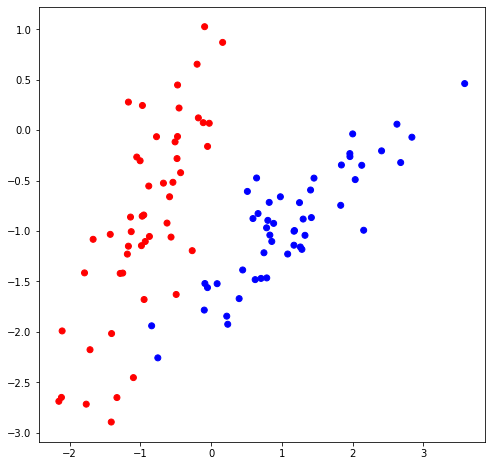

In [10]:
# визуализируем сгенерированные данные

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)), 
              c=classification_labels, cmap=colors);

In [11]:
my_tree = Tree(classification_data, classification_labels, 3)

In [12]:
X_train, X_test, Y_train, Y_test = my_tree.test_train()
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", Y_train.shape)
print("Размер массива ответов для тестовой выборки", Y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [13]:
root = my_tree.build_tree(X_train, Y_train)

In [14]:
my_tree.print_tree(root)

Индекс 0 <= 0.16261402870113306
--> True:
  Индекс 1 <= -1.5208896621663803
  --> True:
    Индекс 0 <= -0.9478301462477035
    --> True:
      Прогноз: 0
    --> False:
      Прогноз: 1
  --> False:
    Прогноз: 0
--> False:
  Прогноз: 1


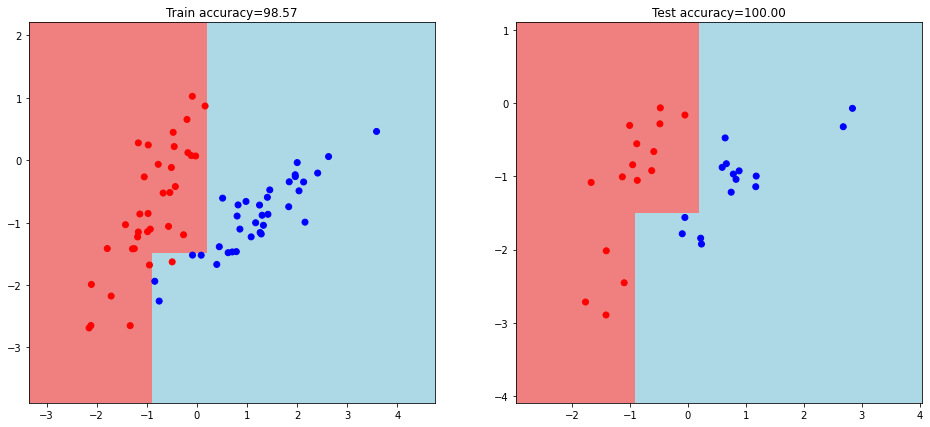

In [15]:
my_tree.visualize(X_train, X_test, Y_train, Y_test)